In [3]:
# this script was written by Erik Blank und Michael Schmidt

# Pointing Technique Experiment

### Experiment
The present script is about the evaluation of a reaction test. It was intended to test whether it is possible to click targets faster if the mouse slows down as soon as it gets close to a target. Ten circles were displayed for this purpose. Nine of them were drawn in black and one of them in red. The goal was to click on the red circle. The circles were displayed in different sizes and the distance from the mouse pointer to the red circle, the reaction time and the accuracy of the click were measured.


### Participants
There were four participants (three males and one female). All were between the age 21 and 23 and are studying in the computer science field. Everyone is well familiar with a mouse and computer. Every participant started either first with the advanced pointing technique activated or deactivated.


### Variables
Independent variables: order of the tests, use of advanced pointing technique <br>
Dependent variables: reaction time <br>
Controlled variables: pointing device (mouse), screen resolution, screen size, screen position, environment <br>
Possible confounding variables: learning effect, fatigue, participants <br>

## Import user log files and combine into one dataframe

In [4]:
import pandas as pd
import glob

In [5]:
# read every log file
# used code from https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe
path = '.' # use your path
all_files = glob.glob(path + "/*.csv")

li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col = None, header = 0)
    li.append(df)

df_allData = pd.concat(li, axis=0, ignore_index = True)
display(df_allData)
#df_allData.to_csv("all_resuls.csv")

,timestamp,id,advanced_pointing,trial,distance,target_size,time_in_ms,click_offset_x,click_offset_y
0,2021-05-11T15:24:51,1,0,0,442.634160,20,1932,-7,-10
1,2021-05-11T15:24:54,1,0,1,1469.001361,50,2684,-25,-23
2,2021-05-11T15:24:56,1,0,2,150.562279,40,1641,-30,-19
3,2021-05-11T15:24:57,1,0,3,1049.855228,60,1670,-23,-44
4,2021-05-11T15:24:58,1,0,4,436.405774,30,978,-16,-13
5,2021-05-11T15:32:18,3,1,0,362.277518,50,663,1,-27
6,2021-05-11T15:32:20,3,1,1,1158.520177,30,1742,-6,-22
7,2021-05-11T15:32:21,3,1,2,882.020975,60,940,-21,-34
8,2021-05-11T15:32:22,3,1,3,252.792405,40,596,-12,-16
9,2021-05-11T15:32:24,3,1,4,909.756011,20,2128,-11,-10


In [6]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sms
from scipy.stats import ttest_ind

## Reaction Time to Circle Size

Hier wird die Reaktionszeit zu der Kreisgröße dargestellt. Aus dem Scatterplot lassen sich keine aussagekräftigen Schlüsse ziehen, dennoch schaut es so aus, dass die neue Technik etwas langsamer ist. Weitere Iterationen würden klarere Ergebnisse zeigen.

Text(0.5, 1.0, 'Reaction Time to Circle Size')

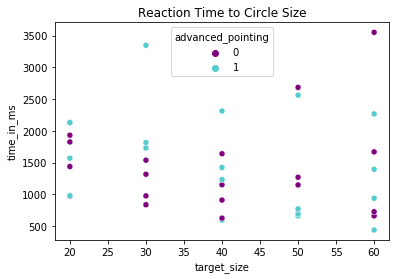

In [7]:
sms.scatterplot(data=df_allData, x="target_size",y="time_in_ms", hue="advanced_pointing", palette=["purple", "#55CCCC"]).set_title("Reaction Time to Circle Size")

## Reaction Time to Distance

Here the reaction time to the distance was shown. It can be seen that both interaction techniques have almost no effect on the reaction time at small distances. At medium distances, you can see that the new technique is slower. 

Text(0.5, 1.0, 'Reaction Time to Distance')

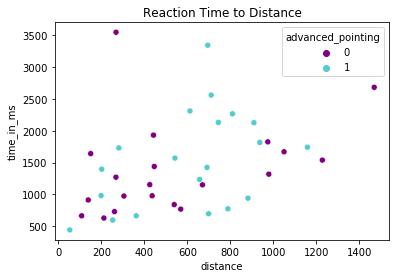

In [8]:
sms.scatterplot(data=df_allData, x="distance",y="time_in_ms", hue="advanced_pointing", palette=["purple", "#55CCCC"]).set_title("Reaction Time to Distance")

## Reactiontime of normal and advanced pointing

Here, the reaction times of the two interaction techniques were presented in a bar chart. The advanced technique is slightly slower than the normal one.

<BarContainer object of 1 artists>

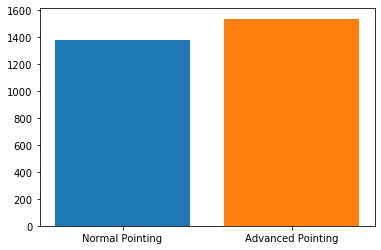

In [9]:
plt.bar("Normal Pointing", df_allData[df_allData['advanced_pointing'] == 0]['time_in_ms'].mean())
plt.bar("Advanced Pointing", df_allData[df_allData['advanced_pointing'] == 1]['time_in_ms'].mean())

## Conclusion

### The test compared the normal pointing technique and an advanced pointing technique. The evaluation of the data showed that the new technique is slightly slower than the normal technique. However, the reason for this could be that the participants had already become used to normal pointing with the mouse and therefore found it easier to use. Testing more participants and collecting more data could help to get a more meaningful result.

In [10]:
cond1_novel_false = df_allData['time_in_ms'][df_allData['advanced_pointing'] == 0]

Text(0, 0.5, 'completion time in ms')

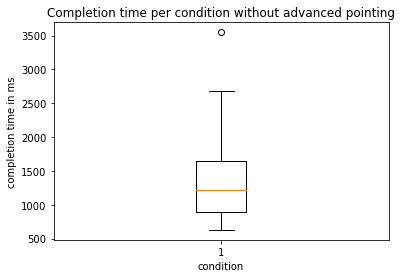

In [16]:
# boxplot
plt.boxplot([cond1_novel_false])
plt.title('Completion time per condition without advanced pointing')
plt.xlabel('condition')
plt.ylabel('completion time in ms')

In [13]:
cond1_novel_true = df_allData['time_in_ms'][df_allData['advanced_pointing'] == 1]

Text(0, 0.5, 'completion time in ms')

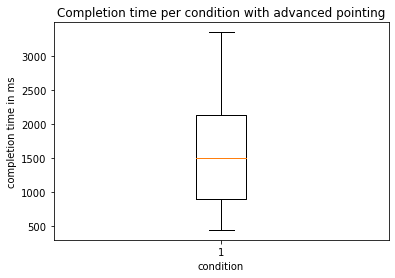

In [15]:
# boxplot
plt.boxplot([cond1_novel_true])
plt.title('Completion time per condition with advanced pointing')
plt.xlabel('condition')
plt.ylabel('completion time in ms')